# EXPLORATORY DATA ANALYSIS

### Exploratory data analysis is performing initial investigations on the data to discover patterns, check assumptions, aided by summary statistics and graphs.

# Importing necessary libraries

In [12]:
import pandas as pd
import numpy as np
import os
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

np.random.seed(42)
from datetime import datetime, timedelta
%matplotlib inline

# Reading Dataset

In [13]:
#all_data = pd.read_csv('C:\OLIST\olistpre\olistpre1\OLIST_ALL_DATA.csv')
all_data = pd.read_csv('/Users/tejaltandel/archive/olist_all_data.csv')

In [14]:
import gc
from datetime import datetime
import time
import warnings
import matplotlib.pyplot as plt
from matplotlib import style

import seaborn as sns
sns.set(style="ticks")
#sns.set_context("poster", font_scale = .2, rc={"grid.linewidth": 2})
import sklearn
import scipy

import random
np.random.seed(42)
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
pd.set_option('display.max_columns', 100)
%matplotlib inline

In [119]:

def format_spines(ax, right_border=True):
    
    ax.spines['bottom'].set_color('#666666')
    ax.spines['left'].set_color('#666666')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#FFFFFF')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    

def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)
        
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Analysis', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Analysis by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()
    
    
def bar_plot(x, y, df, colors='Blues_d', hue=False, ax=None, value=False, title=''):
    
    # Preparing variables
    try:
        ncount = sum(df[y])
    except:
        ncount = sum(df[x])
    #fig, ax = plt.subplots()
    if hue != False:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, hue=hue, ax=ax, ci=None)
    else:
        ax = sns.barplot(x=x, y=y, data=df, palette=colors, ax=ax, ci=None)

    # Setting borders
    format_spines(ax)

    # Setting percentage
    for p in ax.patches:
        xp=p.get_bbox().get_points()[:,0]
        yp=p.get_bbox().get_points()[1,1]
        if value:
            ax.annotate('{:.2f}k'.format(yp/1000), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
        else:
            ax.annotate('{:.1f}%'.format(100.*yp/ncount), (xp.mean(), yp), 
                    ha='center', va='bottom') # set the alignment of the text
    if not hue:
        ax.set_title(df[x].describe().name + ' Analysis', size=12, pad=15)
    else:
        ax.set_title(df[x].describe().name + ' Analysis by ' + hue, size=12, pad=15)
    if title != '':
        ax.set_title(title)  
    plt.tight_layout()

def categorical_plot(cols_cat, axs, df):
    
    idx_row = 0
    for col in cols_cat:
        # Returning column index
        idx_col = cols_cat.index(col)

        # Verifying brake line in figure (second row)
        if idx_col >= 3:
            idx_col -= 3
            idx_row = 1

        # Plot params
        names = df[col].value_counts().index
        heights = df[col].value_counts().values

        # Bar chart
        axs[idx_row, idx_col].bar(names, heights, color='pink')
        if (idx_row, idx_col) == (0, 2):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=30)
        if (idx_row, idx_col) == (1, 1):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=90)

        total = df[col].value_counts().sum()
        axs[idx_row, idx_col].patch.set_facecolor('#FFFFFF')
        format_spines(axs[idx_row, idx_col], right_border=False)
        for p in axs[idx_row, idx_col].patches:
            w, h = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axs[idx_row, idx_col].annotate('{:.1%}'.format(h/1000), (p.get_x()+.29*w,
                                            p.get_y()+h+20), color='k')

        # Plot configuration
        axs[idx_row, idx_col].set_title(col, size=12)
        axs[idx_row, idx_col].set_ylim(0, heights.max()+120)
        

def individual_cat_pie_plot(col, ax, cs, df):
    
    # Creating figure and showing data
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    #if cs:
    #cs = cm.viridis(np.arange(len(names))/len(names))
    explode = np.zeros(len(names))
    explode[0] = 0.05
    wedges, texts, autotexts = ax.pie(heights, labels=names, explode=explode,
                                       startangle=90, shadow=False, 
                                      autopct='%1.1f%%', colors=cs[:len(names)])
    plt.setp(autotexts, size=12, color='w')
    

def donut_plot(col, ax, df, text='', colors=['green', 'crimson', 'blue', 'yellow', 'grey'], labels=['good', 'bad', 'fair', 'bald', 'none']):
    
    sizes = df[col].value_counts().values
    #labels = df[col].value_counts().index
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie((sizes[0], sizes[1], sizes[2], sizes[3], sizes[4]), labels=labels, colors=colors, autopct='%1.1f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    
def categorical_plot(cols_cat, axs, df):
    
    idx_row = 0
    for col in cols_cat:
        # Returning column index
        idx_col = cols_cat.index(col)

        # Verifying brake line in figure (second row)
        if idx_col >= 3:
            idx_col -= 3
            idx_row = 1

        # Plot params
        names = df[col].value_counts().index
        heights = df[col].value_counts().values

        # Bar chart
        axs[idx_row, idx_col].bar(names, heights, color='pink')
        if (idx_row, idx_col) == (0, 2):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=30)
        if (idx_row, idx_col) == (1, 1):
            y_pos = np.arange(len(names))
            axs[idx_row, idx_col].tick_params(axis='x', labelrotation=90)

        total = df[col].value_counts().sum()
        axs[idx_row, idx_col].patch.set_facecolor('#FFFFFF')
        format_spines(axs[idx_row, idx_col], right_border=False)
        for p in axs[idx_row, idx_col].patches:
            w, h = p.get_width(), p.get_height()
            x, y = p.get_xy()
            axs[idx_row, idx_col].annotate('{:.1%}'.format(h/1000), (p.get_x()+.29*w,
                                            p.get_y()+h+20), color='k')

        # Plot configuration
        axs[idx_row, idx_col].set_title(col, size=12)
        axs[idx_row, idx_col].set_ylim(0, heights.max()+120)
        

def individual_cat_pie_plot(col, ax, cs, df):
    
    # Creating figure and showing data
    names = df[col].value_counts().index
    heights = df[col].value_counts().values
    total = df[col].value_counts().sum()
    #if cs:
    #cs = cm.viridis(np.arange(len(names))/len(names))
    explode = np.zeros(len(names))
    explode[0] = 0.05
    wedges, texts, autotexts = ax.pie(heights, labels=names, explode=explode,
                                       startangle=90, shadow=False, 
                                      autopct='%1.1f%%', colors=cs[:len(names)])
    plt.setp(autotexts, size=12, color='w')
    

def donut_plot(col, ax, df, text='', colors=['green', 'crimson'], labels=['good', 'bad']):
    
    sizes = df[col].value_counts().values
    #labels = df[col].value_counts().index
    center_circle = plt.Circle((0,0), 0.80, color='white')
    ax.pie((sizes[0], sizes[1]), labels=labels, colors=colors, autopct='%1.1f%%')
    ax.add_artist(center_circle)
    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)

In [120]:
#df = pd.read_csv("C:\OLIST\olistpre\olistpre1\OLIST_ALL_DATA.csv")
df = pd.read_csv("/Users/tejaltandel/archive/olist_all_data.csv")

# Creating new datasets for each year

### Individual datasets for each year is created to perform the comparison of purchases based on the respective year, month and days

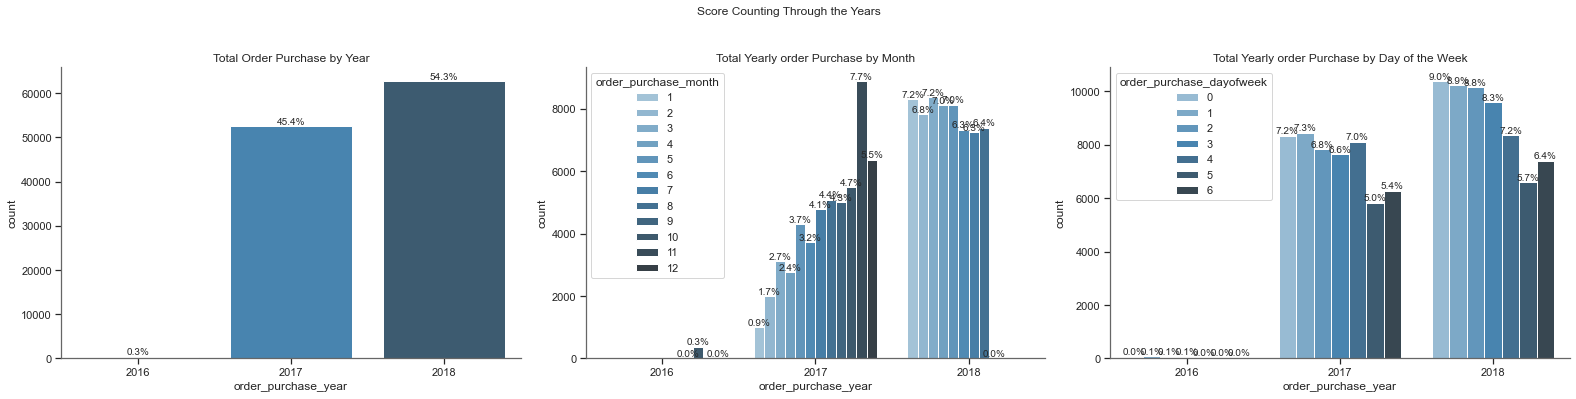

In [121]:
df_2016 = df.query('order_purchase_year=="2016"')
df_2017 = df.query('order_purchase_year=="2017"')
df_2018 = df.query('order_purchase_year=="2018"')

fig, axs = plt.subplots(1, 3, figsize=(22, 5))
count_plot(feature='order_purchase_year', df=df, ax=axs[0], title='Total Order Purchase by Year')
count_plot(feature='order_purchase_year', df=df, ax=axs[1], hue='order_purchase_month', title='Total Yearly order Purchase by Month')
count_plot(feature='order_purchase_year', df=df, ax=axs[2], hue='order_purchase_dayofweek', title='Total Yearly order Purchase by Day of the Week')
plt.suptitle('Score Counting Through the Years', y=1.1)
plt.show()

## Grouping by annual and monthly sales

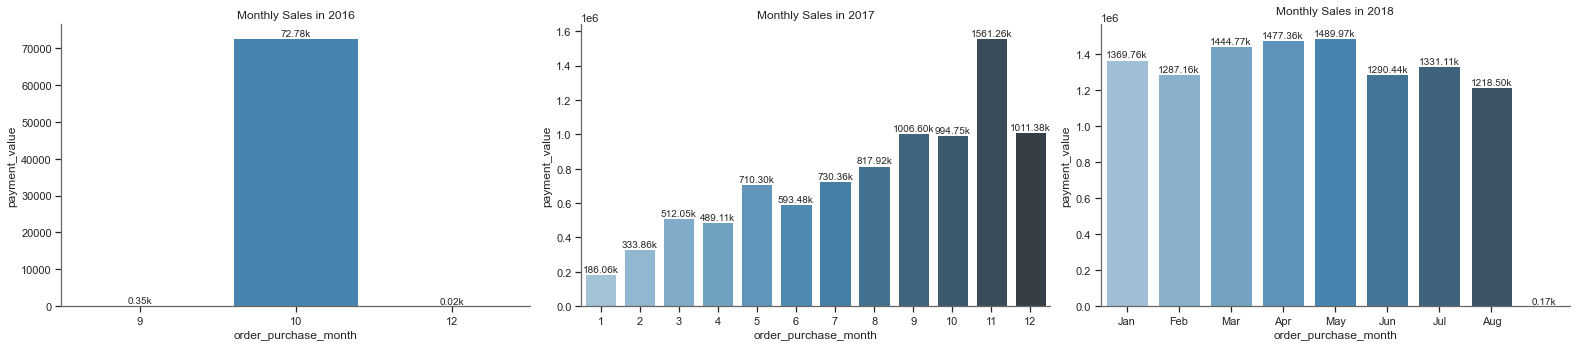

In [122]:
df_ytsales = df.groupby(['order_purchase_year', 'order_purchase_month'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_month', 'payment_value']]
df_ytsales2 = df.groupby(['order_purchase_year', 'order_purchase_dayofweek'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_dayofweek', 'payment_value']]
#df_ytsales = df.groupby(['order_purchase_year', 'order_purchase_month', 'order_purchase_dayofweek'], as_index=False).sum().loc[:, ['order_purchase_year', 'order_purchase_month', 'order_purchase_dayofweek', 'payment_value']]

df_s2016 = df_ytsales[df_ytsales['order_purchase_year']==2016]
df_s2017 = df_ytsales[df_ytsales['order_purchase_year']==2017]
df_s2018 = df_ytsales[df_ytsales['order_purchase_year']==2018]

fig, axs = plt.subplots(1, 3, figsize=(22, 5))
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2016, ax=axs[0], value=True)
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2017, ax=axs[1], value=True)
bar_plot(x='order_purchase_month', y='payment_value', df=df_s2018, ax=axs[2], value=True)
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
axs[2].set_title('Monthly Sales in 2018', pad=10)
plt.xticks(np.arange(8), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug'])
plt.show()

## Changing the month attribute for correct ordenation

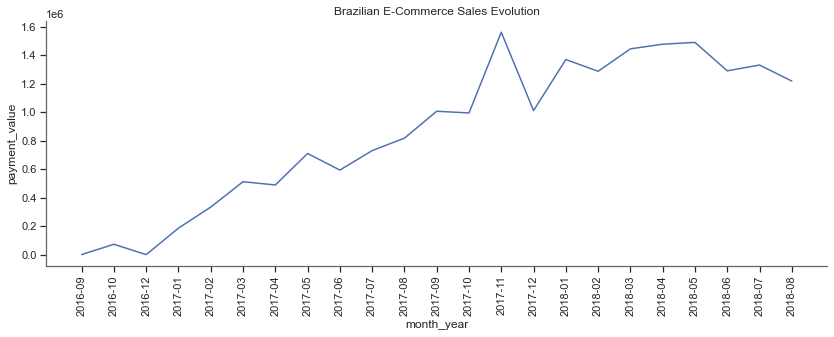

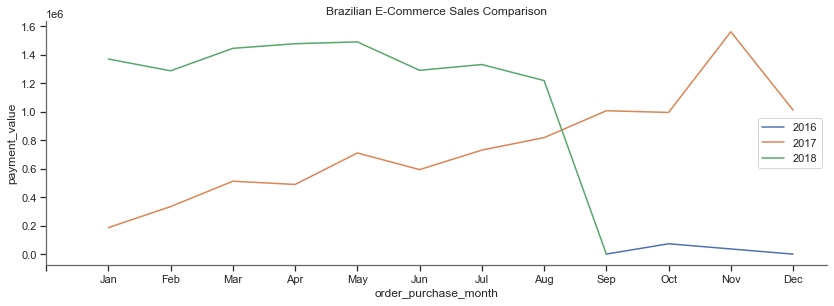

In [123]:
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(str).apply(lambda x: '0' + x if len(x) == 1 else x)

# Creating new year-month column
df_ytsales['month_year'] = df_ytsales['order_purchase_year'].astype(str) + '-' + df_ytsales['order_purchase_month'].astype(str)
df_ytsales['order_purchase_month'] = df_ytsales['order_purchase_month'].astype(int)

# PLotting
fig, ax = plt.subplots(figsize=(14, 4.5))
ax = sns.lineplot(x='month_year', y='payment_value', data=df_ytsales.iloc[:-1, :])
format_spines(ax, right_border=False)
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Brazilian E-Commerce Sales Evolution')
plt.show()

fig, ax = plt.subplots(figsize=(14, 4.5))

ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2016, label='2016')
ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2017, label='2017')
ax = sns.lineplot(x='order_purchase_month', y='payment_value', data=df_s2018, label='2018')
format_spines(ax, right_border=False)
ax.set_title('Brazilian E-Commerce Sales Comparison')
plt.xticks(np.arange(13), ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

## Grouping by customer state

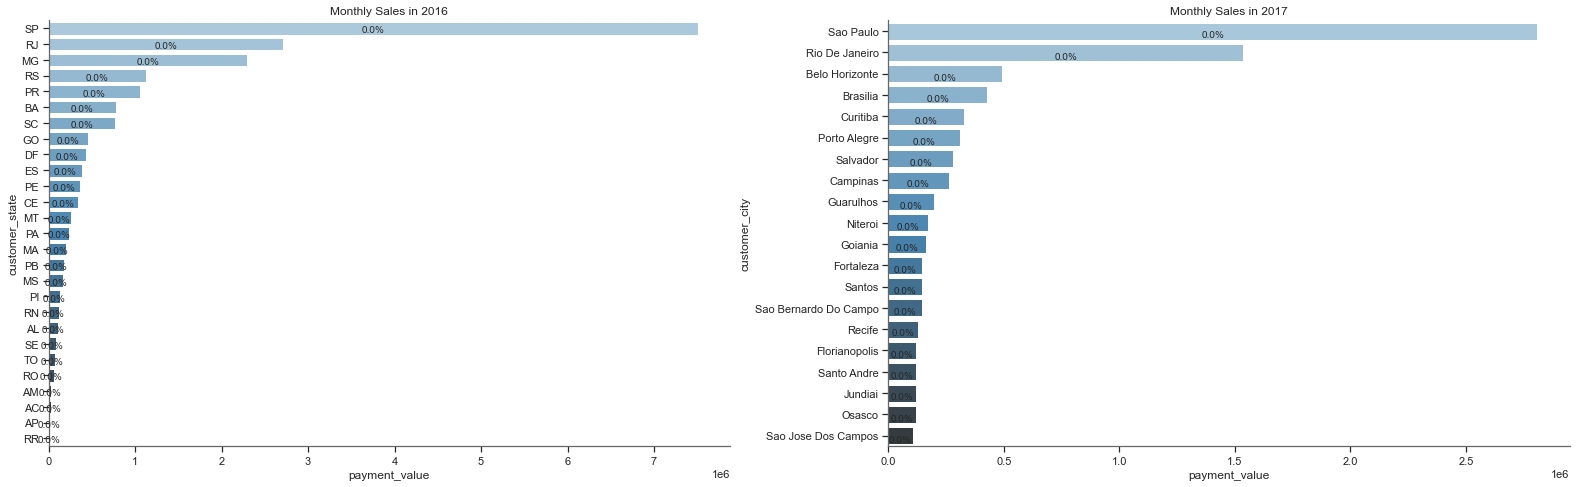

In [124]:

df_cus_st = df.groupby(['customer_state'], as_index=False).sum().loc[:, ['customer_state', 'payment_value']].sort_values(by='payment_value', ascending=False)
df_cus_ct = df.groupby(['customer_city'], as_index=False).sum().loc[:, ['customer_city', 'payment_value']].sort_values(by='payment_value', ascending=False).head(20)

fig, axs = plt.subplots(1, 2, figsize=(22, 7))
bar_plot(x='payment_value', y='customer_state', df=df_cus_st, ax=axs[0], value=False)
bar_plot(x='payment_value', y='customer_city', df=df_cus_ct, ax=axs[1], value=False)
format_spines(ax, right_border=False)
axs[0].set_title('Monthly Sales in 2016')
axs[1].set_title('Monthly Sales in 2017')
plt.savefig("kk.jpg")
plt.show()

## Customer and Delivery behaviour

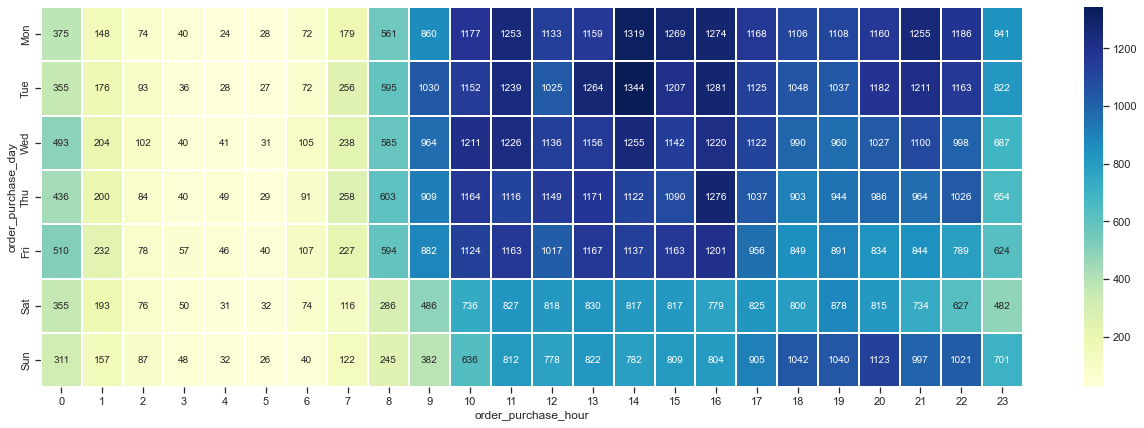

In [125]:
purchase_count = df.groupby(['order_purchase_day', 'order_purchase_hour']).count()['price'].unstack()
plt.figure(figsize=(22,7))
sns.heatmap(purchase_count.reindex(index = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']), cmap="YlGnBu", annot=True, fmt="d", linewidths=0.2)
plt.show()

# FEATURE EXTRACTION

### Creation of data columns

In [127]:
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
             'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date', 'review_answer_timestamp'] 
for col in date_columns:
    all_data[col] = pd.to_datetime(all_data[col], format='%Y-%m-%d %H:%M:%S')

### order_process_time to calculate the duration for a customer order to be processed

In [128]:
all_data ['order_process_time'] = all_data ['order_delivered_customer_date'] - all_data ['order_purchase_timestamp']

### order_delivery_time to calculate delivery duration

In [129]:
all_data ['order_delivery_time'] = all_data ['order_delivered_customer_date'] - all_data ['order_delivered_carrier_date']

### order_time_accuracy to calculate whether the estimated delivery time is as same as actual delivery time

In [130]:
all_data ['order_accuracy_time'] = all_data ['order_estimated_delivery_date'] - all_data ['order_delivered_customer_date']

### order_approved_time to see how long it will take from the order until it is approved

In [131]:
all_data ['order_approved_time'] = all_data ['order_approved_at'] - all_data ['order_purchase_timestamp']

### review_send_time to calculate the duration of satisfaction survey to be sent after the item is receive

In [132]:
all_data ['review_send_time'] = all_data ['review_creation_date'] - all_data ['order_delivered_customer_date']

### review_answer_time column to calculate the duration taken by the customer to fill out the review after sending customer satisfaction survey.

In [133]:
all_data ['review_answer_time'] = all_data ['review_answer_timestamp'] - all_data ['review_creation_date']

In [134]:
# Combine the product_length_cm, product_height_cm, and product_width_cm columns to make it a volume
#with a new column, namely product_volume
all_data ['product_volume'] = all_data ['product_length_cm'] * all_data ['product_height_cm'] * all_data ['product_width_cm']

# DATA EXPLORATION

### Top 20 best selling products

Text(0, 0.5, 'Product category')

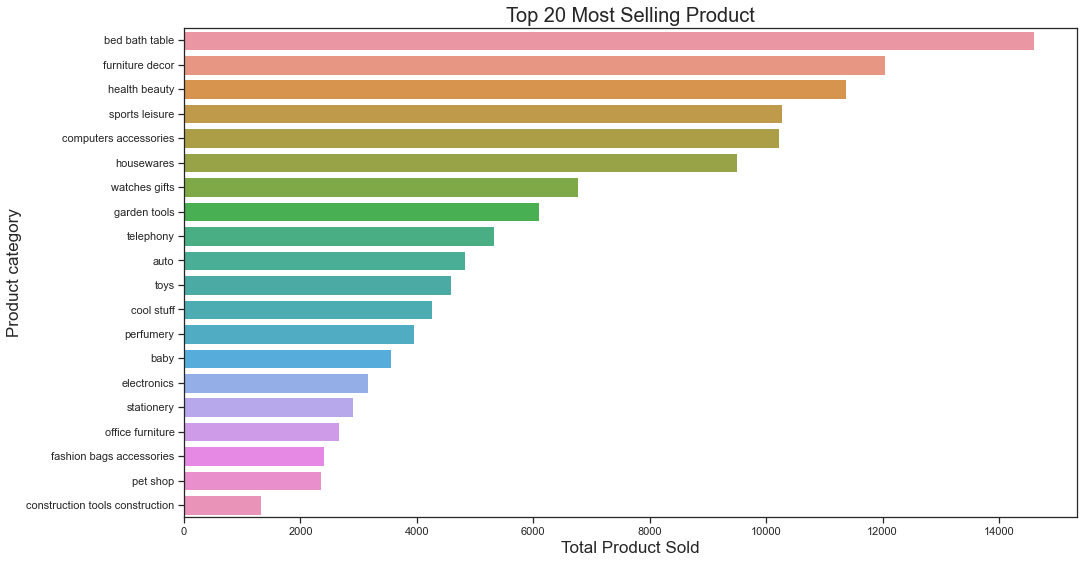

In [136]:
top_20_product_best_seller = all_data['order_item_id'].groupby(all_data['product_category_name_english']).sum().sort_values(ascending=False)[:20]
#print(top_20_product_best_seller)

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_20_product_best_seller.index,x=top_20_product_best_seller.values)
plt.title('Top 20 Most Selling Product',fontsize=20)
plt.xlabel('Total Product Sold',fontsize=17)
plt.ylabel('Product category',fontsize=17)

### Top 20 cities by products

Text(0, 0.5, 'City')

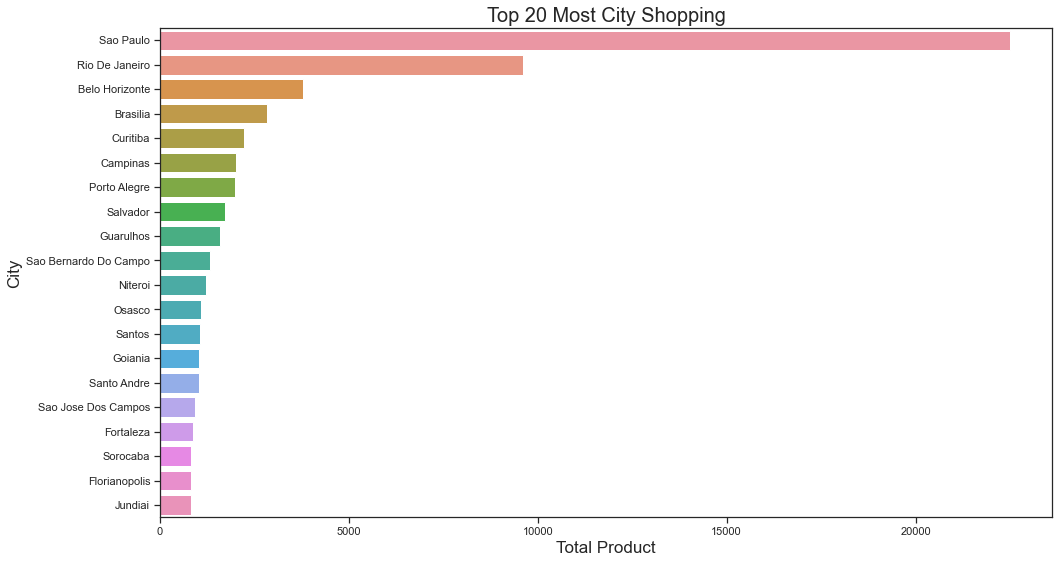

In [137]:

top_20_city_shopping = all_data ['order_item_id']. groupby (all_data ['customer_city']). sum (). sort_values (ascending = False) [: 20]
#print (top_20_city_shopping)

#We plot the visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = top_20_city_shopping.index, x = top_20_city_shopping.values)
plt.title ('Top 20 Most City Shopping', fontsize = 20)
plt.xlabel ('Total Product', fontsize = 17)
plt.ylabel ('City', fontsize = 17)

### Top 10 customers by products ordered

customer_id
270c23a11d024a44c896d1894b261a83    63
13aa59158da63ba0e93ec6ac2c07aacb    38
9af2372a1e49340278e7c1ef8d749f34    29
92cd3ec6e2d643d4ebd0e3d6238f69e2    26
63b964e79dee32a3587651701a2b8dbf    24
d22f25a9fadfb1abbc2e29395b1239f4    24
2ba91e12e5e4c9f56b82b86d9031d329    24
86cc80fef09f7f39df4b0dbce48e81cb    24
6ee2f17e3b6c33d6a9557f280edd2925    24
b246eeed30b362c09d867b9e598bee51    22
Name: order_item_id, dtype: int64


Text(0, 0.5, 'No of Products ordered')

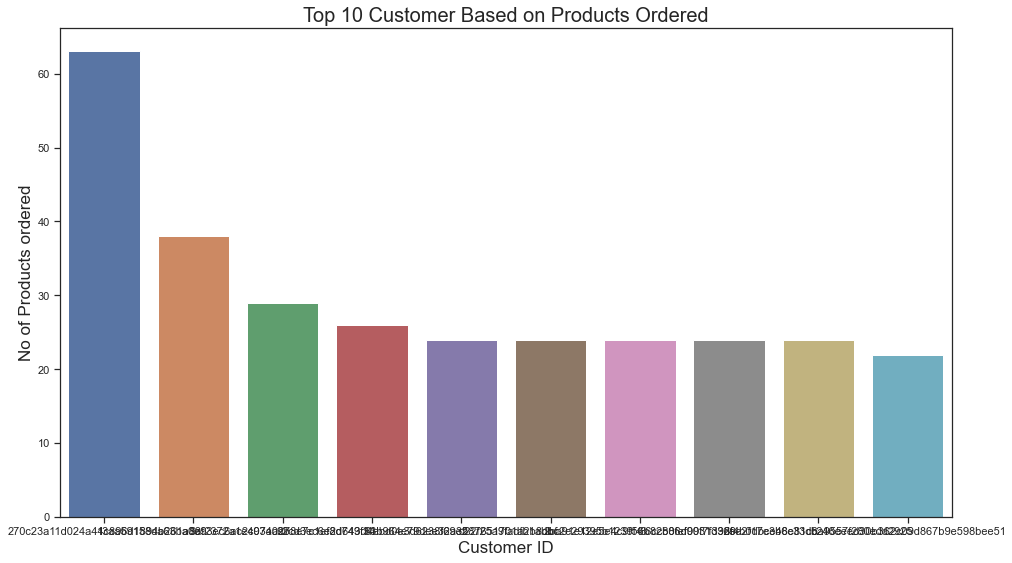

In [138]:
top_10_customer_shopping = all_data['order_item_id'].groupby(all_data['customer_id']).count().sort_values(ascending=False)[:10]
print(top_10_customer_shopping)

#Kita plot untuk visualisasinya
fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_customer_shopping.values,x=top_10_customer_shopping.index)
plt.title('Top 10 Customer Based on Products Ordered',fontsize=20)
plt.xlabel('Customer ID',fontsize=17)
plt.ylabel('No of Products ordered',fontsize=17)

### Top 10 sellers by revenue

Text(0, 0.5, 'Seller ID')

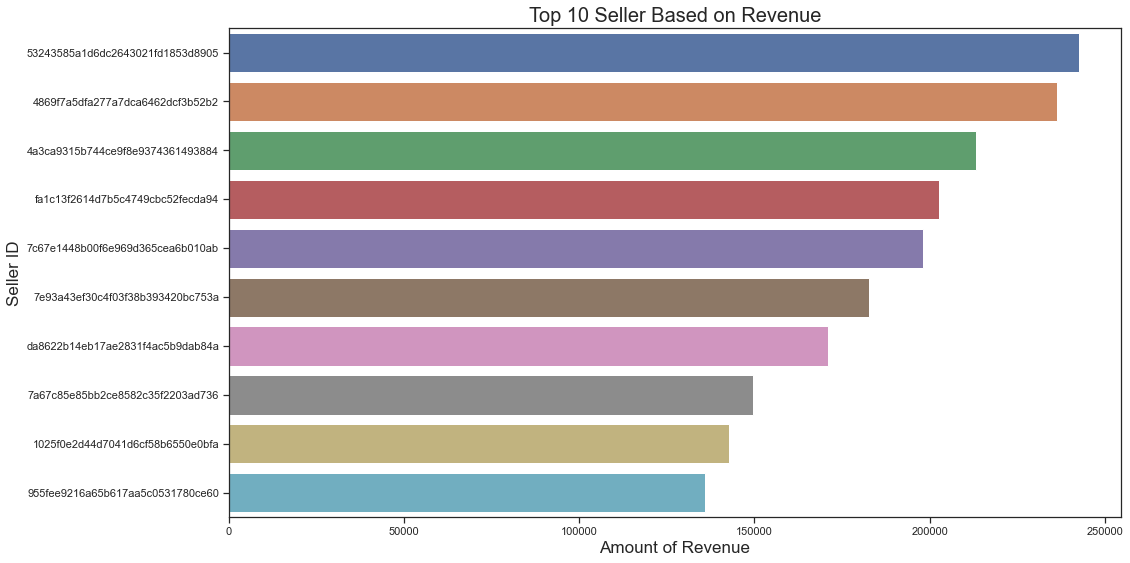

In [140]:
top_10_seller_order = all_data['price'].groupby(all_data['seller_id']).sum().sort_values(ascending=False)[:10]
#print(top_10_seller_order)


fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.values)
plt.title('Top 10 Seller Based on Revenue',fontsize=20)
plt.xlabel('Amount of Revenue',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

### Top 10 sellers by review score 

Text(0, 0.5, 'Seller ID')

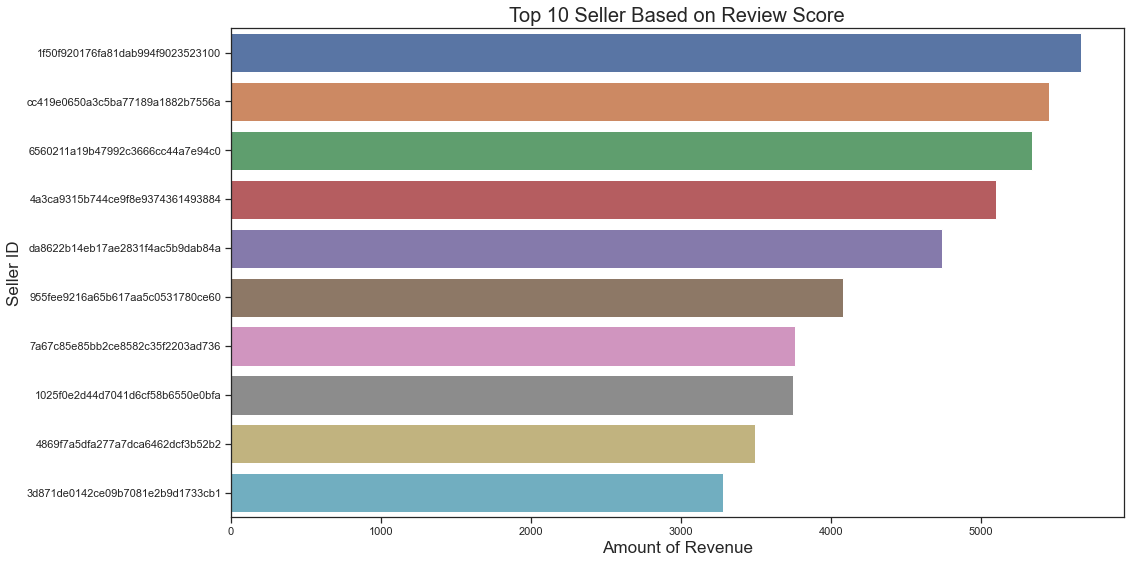

In [141]:
top_10_seller_order = all_data[all_data['review_score'] == 5].groupby(all_data['seller_id']).sum().sort_values(by=['review_score'],ascending=False)[:10]
#print(top_10_seller_order)

fig=plt.figure(figsize=(16,9))
sns.barplot(y=top_10_seller_order.index,x=top_10_seller_order.review_score)
plt.title('Top 10 Seller Based on Review Score',fontsize=20)
plt.xlabel('Amount of Revenue',fontsize=17)
plt.ylabel('Seller ID',fontsize=17)

### Median order time by month

In [142]:
round(all_data.order_status.value_counts() / len(all_data),2)

delivered      0.98
shipped        0.01
canceled       0.00
invoiced       0.00
processing     0.00
unavailable    0.00
approved       0.00
Name: order_status, dtype: float64

In [143]:
all_data['Month_order'] = all_data['order_purchase_timestamp'].dt.to_period('M').astype('str')

Text(0, 0.5, 'Time (Day)')

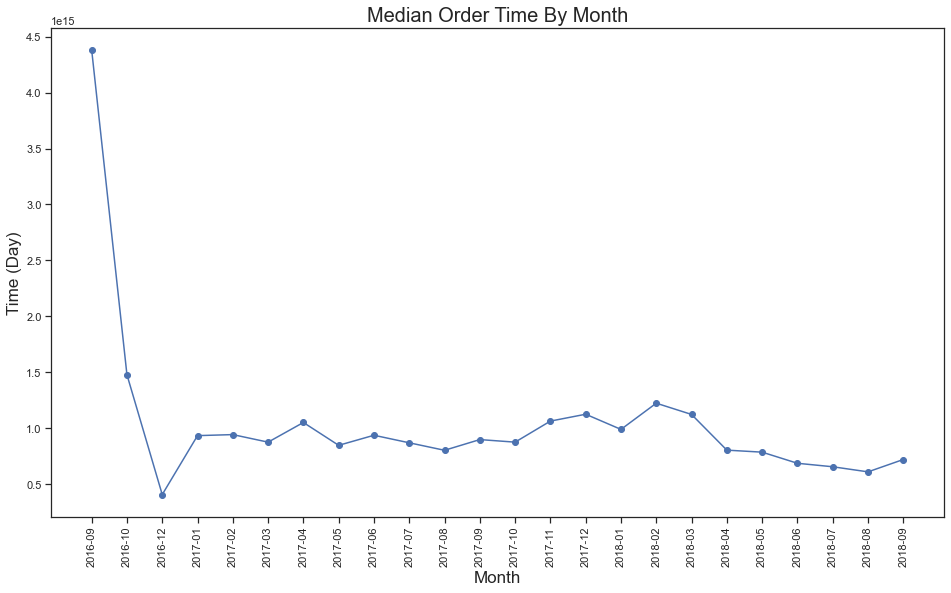

In [144]:
order_time_by_month = all_data['order_process_time'].groupby(all_data['Month_order']).median(numeric_only=False)

fig=plt.figure(figsize=(16,9))
plt.plot(order_time_by_month.index, order_time_by_month.values, marker='o')
plt.title('Median Order Time By Month',fontsize=20)
plt.xlabel('Month',fontsize=17)
plt.xticks(#[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#         ['January', 'February', 'March','April', 'Mei', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
          rotation=90)
plt.ylabel('Time (Day)',fontsize=17)

### Median delivery time for each month

Text(0, 0.5, 'Time (Day)')

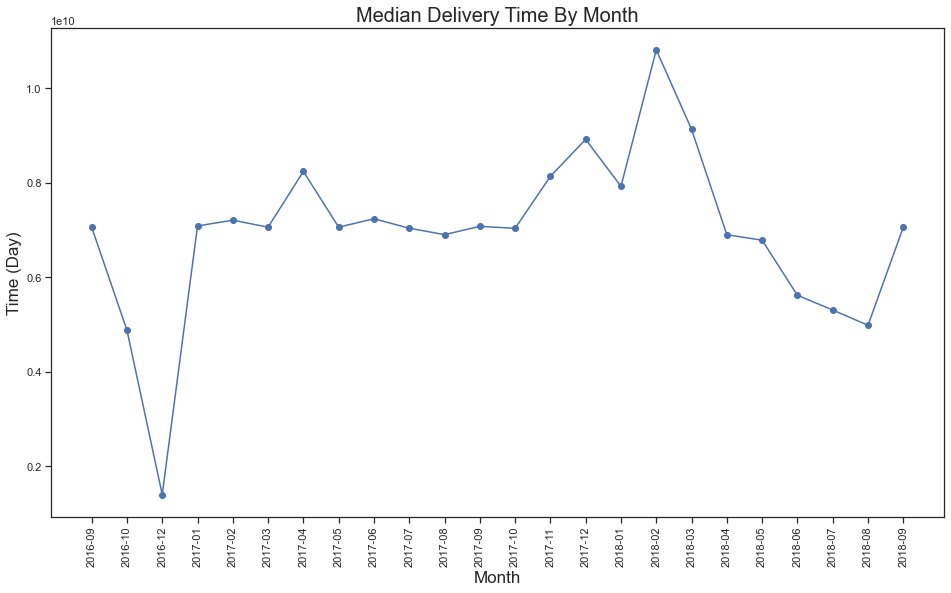

In [145]:
delivery_time_by_month = all_data ['order_delivery_time']. groupby (all_data ['Month_order']). median (numeric_only = False) # enter numeric_only arguments to calculate timedelta

#Create the visualization
fig = plt.figure (figsize = (16,9))
plt.plot (delivery_time_by_month.index, delivery_time_by_month.values / 86400, marker = 'o')
plt.title ('Median Delivery Time By Month', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
          # ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] ,
           rotation = 90)
plt.ylabel ('Time (Day)', fontsize = 17)

### Median order accuracy by month

Text(0, 0.5, 'Time (Day)')

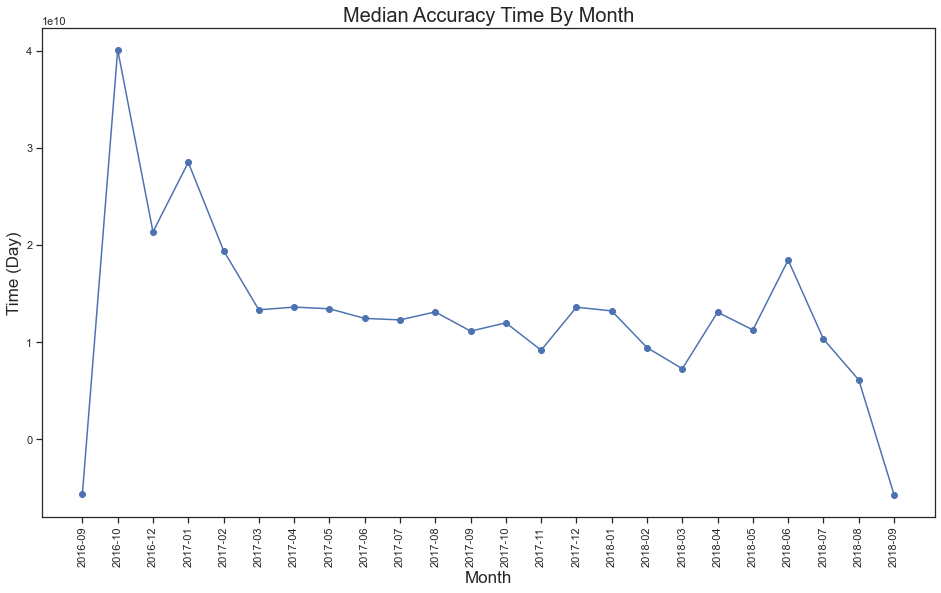

In [146]:
accuracy_time_by_month = all_data ['order_accuracy_time']. groupby (all_data ['Month_order']). median (numeric_only = False) # enter numeric_only arguments to calculate timedelta

#Create the visualization
fig = plt.figure (figsize = (16,9))
plt.plot (accuracy_time_by_month.index, accuracy_time_by_month.values / 86400, marker = 'o')
plt.title ('Median Accuracy Time By Month', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (# [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           # ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] ,
           rotation = 90)
plt.ylabel ('Time (Day)', fontsize = 17)

### Top 10 product categories with the fastest time from order to customer acceptance

Text(0, 0.5, 'Product Category')

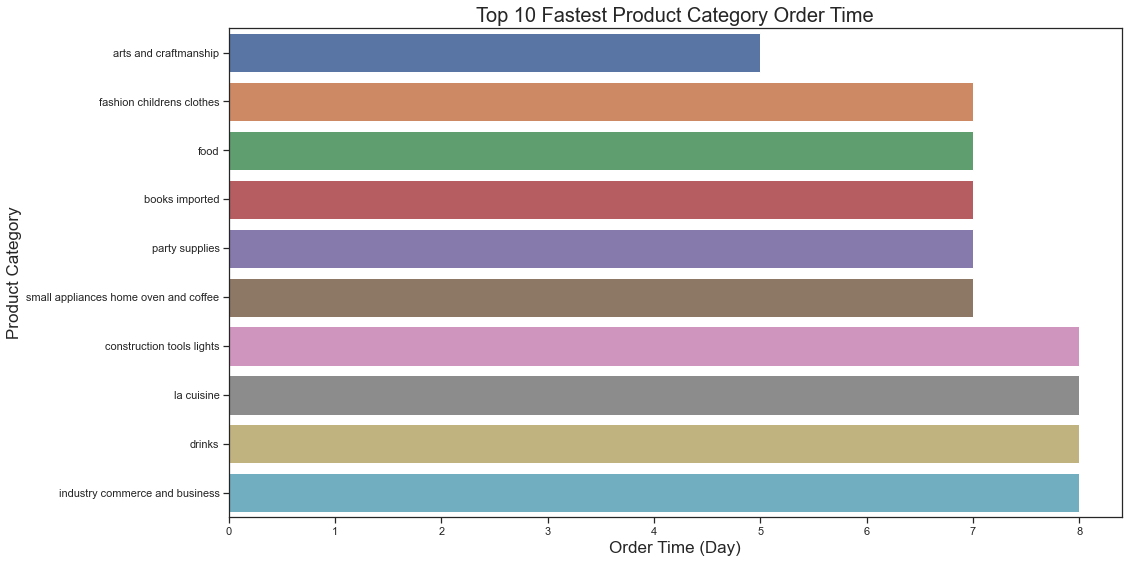

In [147]:
# 10 product categories with the fastest time from order to customer acceptance
order_time_by_category = pd.DataFrame (all_data ['order_process_time']. groupby (all_data ['product_category_name_english']). median (numeric_only = False) .sort_values (ascending = True) [: 10])

#Visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = order_time_by_category.index, x = order_time_by_category ['order_process_time']. dt.days)
plt.title ('Top 10 Fastest Product Category Order Time', fontsize = 20)
plt.xlabel ('Order Time (Day)', fontsize = 17)
plt.ylabel ('Product Category', fontsize = 17)

### Orderds each month

Text(0, 0.5, 'Amount Order')

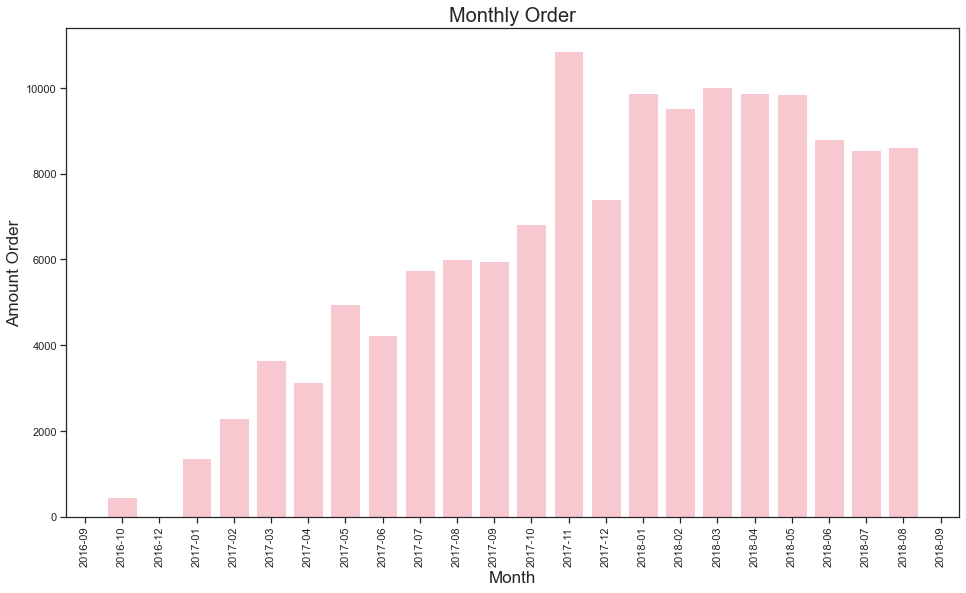

In [149]:
order_count_by_month = all_data ['order_item_id']. groupby (all_data ['Month_order']). sum ()

#Visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = order_count_by_month.values, x = order_count_by_month.index, color = "Pink")
plt.title ('Monthly Order', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (rotation = 90)
plt.ylabel ('Amount Order', fontsize = 17)

### Monthly Revenue

Text(0, 0.5, 'Amount Revenue')

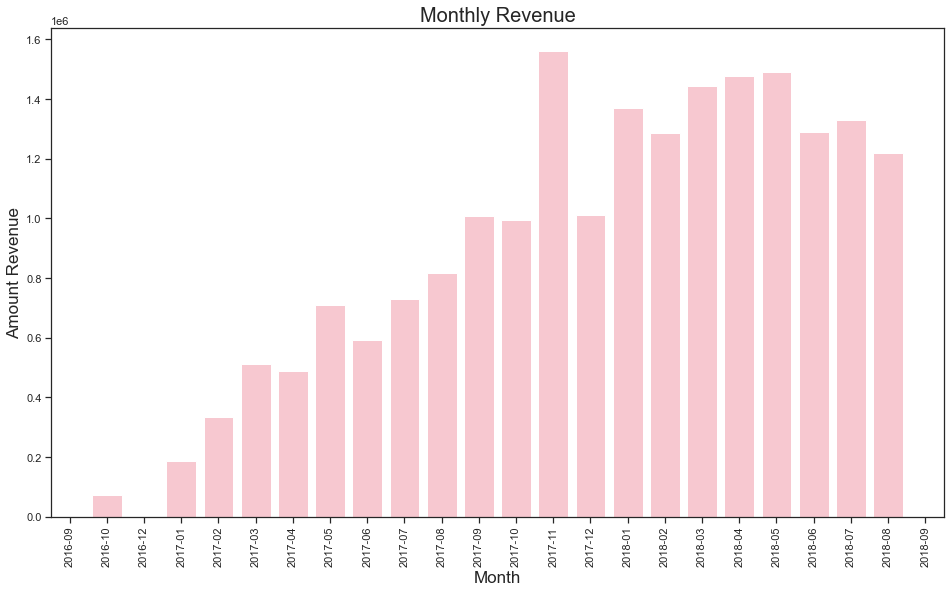

In [150]:
revenue_count_by_month = all_data ['payment_value']. groupby (all_data ['Month_order']). sum ()

#Visualization
fig = plt.figure (figsize = (16,9))
sns.barplot (y = revenue_count_by_month.values, x = revenue_count_by_month.index, color = "Pink")
plt.title ('Monthly Revenue', fontsize = 20)
plt.xlabel ('Month', fontsize = 17)
plt.xticks (rotation = 90)
plt.ylabel ('Amount Revenue', fontsize = 17)


# ANALYSIS ON PAYMENT

In [152]:
#olist_payments= pd.read_csv('C:\OLIST\olistpre\olistpre1\olist_order_payments_dataset_new.csv')
olist_payments= pd.read_csv('/Users/tejaltandel/archive/olist_order_payments_dataset.csv')

In [153]:
olist_payments['value_log'] = olist_payments['payment_value'].apply(lambda x: np.log(x) if x > 0 else 0)
unique_ = olist_payments['order_id'].nunique()
print("DataFrame shape: {}; unique order ids: {}".format(olist_payments.shape, unique_))
olist_payments.head()

DataFrame shape: (103886, 6); unique order ids: 99440


,order_id,payment_sequential,payment_type,payment_installments,payment_value,value_log
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4.598448
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,3.194173
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,4.185251
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,4.680092
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45,4.855540


/Users/tejaltandel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/tejaltandel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


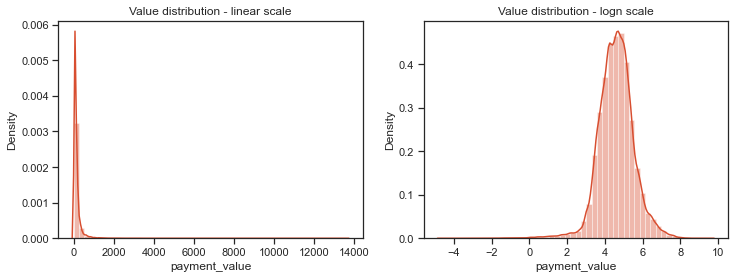

In [154]:
def plot_dist(values, log_values, title, color="#D84E30"):
    fig, axis = plt.subplots(1, 2, figsize=(12,4))
    axis[0].set_title("{} - linear scale".format(title))
    axis[1].set_title("{} - logn scale".format(title))
    ax1 = sns.distplot(values, color=color, ax=axis[0])
    ax2 = sns.distplot(log_values, color=color, ax=axis[1])
log_value = olist_payments.payment_value.apply(lambda x: np.log(x) if x > 0 else 0)
plot_dist(olist_payments.payment_value, log_value, "Value distribution")

In [155]:
olist_payments.describe()

,payment_sequential,payment_installments,payment_value,value_log
count,103886.000000,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380,4.597031
std,0.706584,2.687051,217.494064,0.937496
min,1.000000,0.000000,0.000000,-4.605170
25%,1.000000,1.000000,56.790000,4.039360
50%,1.000000,1.000000,100.000000,4.605170
75%,1.000000,4.000000,171.837500,5.146549
max,29.000000,24.000000,13664.080000,9.522526


In [156]:
olist_payments[olist_payments['payment_installments'] > 1]['payment_type'].value_counts().to_frame()

,payment_type
credit_card,51338


### When we plot the number of installments we can see some patterns. Most sellers in Brazil offer the option to divide the payment up to 10 installments and the mean product value increases until this number. Seven and nine installments are not usual
